In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
filepath = r'C:\Users\gabri\OneDrive\Documentos\Portfolio'
filename = 'AirbnbRJRentals.xlsx'
df = pd.read_excel(filepath + '\\' + filename)

In [2]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'lat1', 'longitude', 'long1', 'room_type', 'price-raw', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'number_of_reviews_ltm',
       'days since last review', 'Entire home/apt', 'Private room',
       'Shared room', 'availability_365', 'Occupancy rate', 'last_review'],
      dtype='object')

In [3]:
del_colunas = ['latitude','longitude','price', 'availability_365', 'last_review','reviews_per_month', 'number_of_reviews']
df1 = df.drop(columns = del_colunas)

In [11]:
df1[['id', 'host_id','Entire home/apt',	'Private room', 'Shared room']] = df[['id', 'host_id','Entire home/apt',	'Private room', 'Shared room']].astype('object')
describe_quant = df1.describe(exclude = ['object']).round(2)
describe

,price-raw,minimum_nights,calculated_host_listings_count,number_of_reviews_ltm,days since last review,Occupancy rate
count,27573.00,27573.00,27573.00,27573.00,19483.00,27573.00
mean,898.92,4.81,9.42,6.26,581.35,0.44
std,1081.51,23.58,27.84,10.68,503.47,0.37
min,33.00,1.00,1.00,0.00,324.00,0.00
25%,309.00,2.00,1.00,0.00,345.00,0.04
50%,592.00,2.00,1.00,1.00,372.00,0.41
75%,1000.00,4.00,4.00,8.00,462.00,0.79
max,10000.00,1125.00,228.00,122.00,4289.00,1.00


In [12]:
describe_quali = df1.describe(include = ['object'])
describe_quali

,id,name,host_id,host_name,neighbourhood,lat1,long1,room_type,Entire home/apt,Private room,Shared room
count,2.733900e+04,27544,27573,27570,27573,27573,27573,27573,27573,27573,27573
unique,2.733900e+04,26665,17409,5207,152,12870,14992,4,2,2,2
top,7.100768e+17,Apartamento em Copacabana,341887136,Daniel,Copacabana,"-22,98456","-43,1911",Entire home/apt,1,0,0
freq,1.000000e+00,55,228,282,8136,20,19,21823,21823,22311,27132


In [16]:
df['room_type'].value_counts()

room_type
Entire home/apt    21823
Private room        5262
Shared room          441
Hotel room            47
Name: count, dtype: int64

In [6]:
import numpy as np
numeric_columns = df1.select_dtypes(include=[np.number])
correlacoes = numeric_columns.corr()
correlacoes

,price-raw,minimum_nights,calculated_host_listings_count,number_of_reviews_ltm,days since last review,Entire home/apt,Private room,Shared room,Occupancy rate
price-raw,1.000000,0.002694,0.278161,-0.072147,0.004376,0.273265,-0.260054,-0.079968,-0.072164
minimum_nights,0.002694,1.000000,0.009498,-0.051730,0.082480,0.011545,-0.008727,-0.008186,-0.012784
calculated_host_listings_count,0.278161,0.009498,1.000000,-0.033958,-0.049007,0.110326,-0.107074,-0.020567,0.010228
number_of_reviews_ltm,-0.072147,-0.051730,-0.033958,1.000000,-0.331869,0.103462,-0.091103,-0.049896,0.152508
days since last review,0.004376,0.082480,-0.049007,-0.331869,1.000000,-0.097374,0.089951,0.032511,-0.029875
Entire home/apt,0.273265,0.011545,0.110326,0.103462,-0.097374,1.000000,-0.946105,-0.248371,0.089957
Private room,-0.260054,-0.008727,-0.107074,-0.091103,0.089951,-0.946105,1.000000,-0.061915,-0.076704
Shared room,-0.079968,-0.008186,-0.020567,-0.049896,0.032511,-0.248371,-0.061915,1.000000,-0.053477
Occupancy rate,-0.072164,-0.012784,0.010228,0.152508,-0.029875,0.089957,-0.076704,-0.053477,1.000000


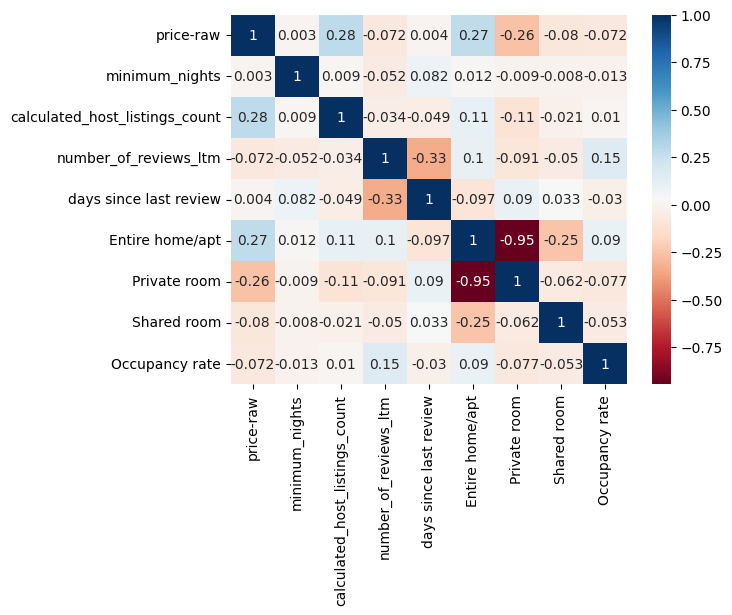

<Figure size 1000x1000 with 0 Axes>

In [9]:
import seaborn as sns
sns.heatmap(correlacoes.round(3),cmap = 'RdBu', annot = True)
plt.figure(figsize = (10,10));